In [1]:
import csv

In [2]:
import numpy as np

In [3]:
from sklearn.svm import SVR # support vector regression

In [4]:
import matplotlib.pyplot as plt

In [5]:
import pandas as pd

In [6]:
import matplotlib

dates = []
prices = []

def get_data(filename):
    with open(filename, 'r') as csvfile:
        csvFileReader = csv.reader(csvfile)
        next(csvFileReader)
        for row in csvFileReader:
            dates.append(int(row[0].split('-')[2]))
            prices.append(float(row[1]))
    return dates, prices

def predict_prices(dates, prices, x):
    dates = np.reshape(dates, (len(dates), 1)) # formatting list to become nx1 matrix 

    svr_lin = SVR(kernel = 'linear', C = 1e3) # type of SVR and penalty
    svr_poly = SVR(kernel = 'poly', C = 1e3, degree = 2) # trying different functions
    svr_rbf = SVR(kernel = 'rbf', C = 1e3, gamma = 0.1) # euclidian distance between two inputs 

    svr_lin.fit(dates, prices) # fitting and training models on date and price data  
    svr_poly.fit(dates, prices)
    svr_rbf.fit(dates, prices)

    plt.scatter(dates, prices, color = 'red', label = 'Data')
    plt.plot(dates, svr_lin.predict(dates), color = 'black', label = 'Linear')
    plt.plot(dates, svr_poly.predict(dates), color = 'blue', label = 'Poly')
    plt.plot(dates, svr_rbf.predict(dates), color = 'green', label = 'RBF')

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('SVR Modelling')

    plt.legend()
    plt.show() # display it 

    return svr_rbf.predict(x)[0], svr_lin.predict(x)[0], svr_poly.predict(x)[0] # returning predictions

# rbf best fit 

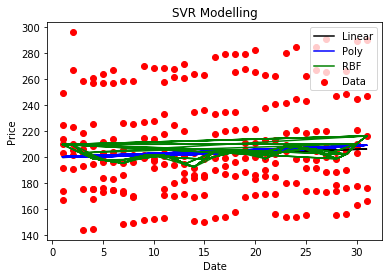

In [7]:
dates, prices = get_data('AAPL.csv')
p, pp, ppp = predict_prices(dates, prices, [[29]])

In [ ]:
# More accurate model using keras and tensorflow backend
from keras.layers.core import Dense, Activation, Dropout 
from keras.layers.recurrent import LSTM
from keras.models import Sequential, load_model 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import os

df = pd.read_csv('AAPL.csv')
df = df['Open'].values
df = df.reshape(-1, 1) 

dataset_train = np.array(df[:int(df.shape[0]*0.8)]) # 80% of set used in training 
dataset_test = np.array(df[int(df.shape[0]*0.8)-50:]) #-50 for overlap
scalar = MinMaxScaler(feature_range=(0,1)) # scaling between 0 and 1
dataset_train = scalar.fit_transform(dataset_train) # fitting and transforming data 

def Create_Data(df):
    a = []
    b = []
    for i in range(50, df.shape[0]):
        a.append(df[1-50:1, 0])
        b.append(df[1,0])
    a = np.array(a)
    b = np.array(b)
    return a, b 
a_train, b_train = Create_Data(dataset_train)
a_test, b_test = Create_Data(dataset_test)
# creating testing dataset

a_train = np.reshape(a_train, (a_train.shape[0], a_train.shape[1], 1))
a_test = np.reshape(a_test, (a_test.shape[0], a_test.shape[1], 1)) 
# reshaping data to use with LSTM layer

# Adding LSTM layers
model = Sequential()
model.add(LSTM(units = 100, return_sequences = True, input_shape = (a_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 100, return_sequences = False))
model.add(Dropout(0.2))
model.add(LSTM(units = 100))

model.add(Dense(units = 1))

model.compile(loss = 'mean_squared_error', optimizer = 'adam' )
model.fit(a_train, b_train, epochs = 50, batch_size = 32)
model.save('StockPrediction')
model = load_model('StockPrediction')
